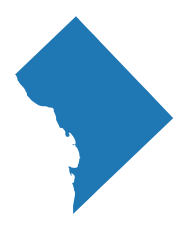

In [1]:
import osmnx as ox
city = ox.geocode_to_gdf('Washington, D.C.')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

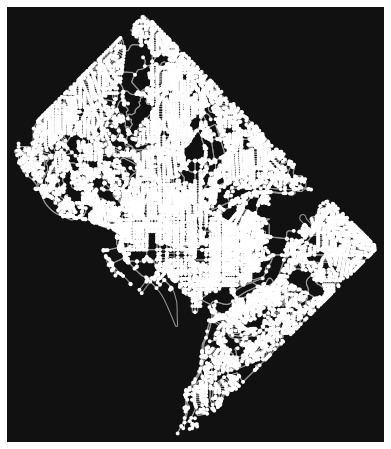

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
G = ox.graph_from_place('Washington, D.C.', network_type='drive')
ox.plot_graph(G)

In [3]:
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)


C:\Users\Monty\.conda\envs\ox\lib\site-packages\osmnx\simplification.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
C:\Users\Monty\.conda\envs\ox\lib\site-packages\osmnx\simplification.py:466: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


In [5]:
G = ox.project_graph(ox.graph_from_place('Washington D.C., USA', network_type='drive'))
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

In [6]:
G = ox.graph_from_xml("district-of-columbia-latest.osm.bz2")

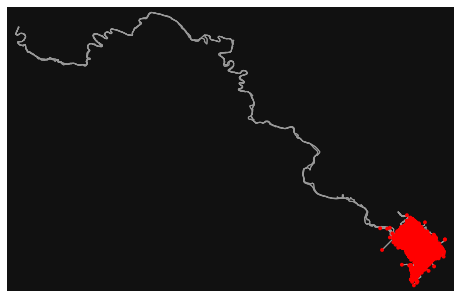

In [7]:
fig, ax = ox.plot_graph(G, node_color="r")

In [8]:
### The line is for the Potomac river

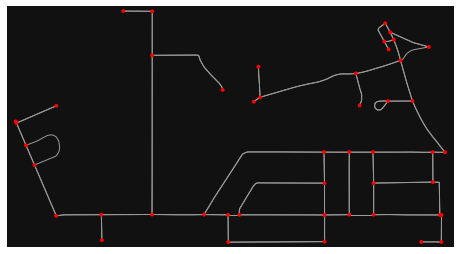

In [11]:
# define a bounding box in DC
north, south, east, west = 38.937679, 38.941212, -77.075133, -77.066525

# create network from that bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
fig, ax = ox.plot_graph(G, node_color="r")

In [12]:
G.nodes

NodeView((49774762, 49780129, 49780190, 49780193, 49802377, 49843926, 49843934, 49843990, 49858900, 49869544, 49876211, 49876217, 49876232, 49884916, 49884932, 3036818641, 3036818676, 3036827024, 3036829041, 5445478155, 5445478158, 5445483937, 5445483938, 6799427734, 6799427735, 6799427737, 6799427738, 7063054938, 7063054942, 7199860225, 7199860226, 7199860227, 7199860228, 7808602127, 7808602134, 7959913472, 8111663687, 8411960992, 8581542171, 8894434815, 8894460320, 8894460321, 8894460325, 9037089933, 9037089934, 9047445298, 9047445299))

In [14]:
G.nodes[49774762]

{'y': 38.940656, 'x': -77.067109, 'street_count': 3}